# Importing necessory dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
data =pd.read_csv("C:/Users/inzmamul.haq/Downloads/Restaurant_Reviews.tsv",sep='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
data.shape

(1000, 2)

#Checking for null values

In [4]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

#Checking for duplicate rows

In [5]:
data[data.duplicated()]

,Review,Liked
814,I love this place.,1
816,The food was terrible.,0
843,I won't be back.,0
846,I would not recommend this place.,0


In [6]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [7]:
data.drop_duplicates(keep='first',inplace=True)

In [8]:
data.shape

(996, 2)

In [9]:
data['char_len'] =data['Review'].apply(len)

In [10]:
data['token'] =data['Review'].apply(lambda x:len(x.split()))

In [11]:
data.head()

,Review,Liked,char_len,token
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


#Checking for imbalance output variable

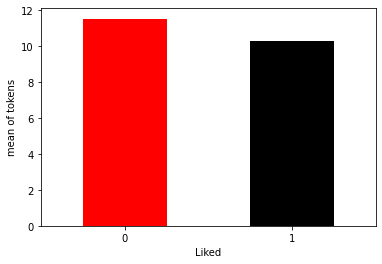

In [12]:
mean_values =data.groupby('Liked')['token'].mean()

mean_values.plot(kind='bar',color =['red','black'])
plt.xlabel('Liked')
plt.ylabel('mean of tokens')
plt.xticks(rotation=0)
plt.show()

#Removing stopwords and applying stemming on the words

In [13]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\inzmamul.haq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stopwords =stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
custom_stopwords ={"aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't",
                   "needn't",'not',"shan't", "shouldn't","wasn't","weren't","won't","wouldn't","don","ain","aren","hadn",
                  "hasn","haven","isn","ma","mightn","mustn","needn","shan","no","nor","shouldn","wasn","weren","won","wouldn"}

In [16]:
stopwords =set(stopwords)-custom_stopwords

In [17]:
import re
from nltk.stem import PorterStemmer
ps =PorterStemmer()

#Cleaning dataset

In [18]:


corpus =[]
for i in range(len(data)):
    review =re.sub('[^a-zA-Z]',' ',data['Review'].iloc[i])
    review =review.lower() 
    review =review.split() 
    review =[ps.stem(w) for w in review if w not in stopwords]
    review =' '.join(review)
    corpus.append(review)
data['processed_Review'] =corpus

In [19]:
data['processed_Review'].head()

0                                       wow love place
1                                       crust not good
2                               not tasti textur nasti
3    stop late may bank holiday rick steve recommen...
4                              select menu great price
Name: processed_Review, dtype: object

In [20]:
pip install nltk wordcloud matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from wordcloud import WordCloud

In [22]:
#data[data['Liked']==1]['processed_Review'].str.cat(sep=' ')
filtered_data =data[data['Liked']==1]
text =' '.join(filtered_data['processed_Review'])

In [23]:
#wc =WordCloud(width=500,height=500,min_font_size=8,background_color='white').generate(text)
#plt.imshow(wc)

In [24]:
data.head()

,Review,Liked,char_len,token,processed_Review
0,Wow... Loved this place.,1,24,4,wow love place
1,Crust is not good.,0,18,4,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,select menu great price


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv =CountVectorizer(max_features=1000)
X =cv.fit_transform(data['processed_Review']).toarray() 
y =data['Liked']

In [27]:
X.shape,y.shape

((996, 1000), (996,))

#splitting data into train & test dataset

In [28]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

#Training the models in pipeline & selecing optimal one 

In [30]:
models ={'Random Forest':RandomForestClassifier(),
        'Logistic Regression':LogisticRegression(),
        'Decision Tree':DecisionTreeClassifier(),
        'GaussianNB':GaussianNB(),
        'svc':SVC()}

In [31]:
for name,model in models.items():
    pipeline =Pipeline([
        ('scaler',StandardScaler()),
        ('classifier',model)])
    pipeline.fit(X_train,y_train) 
    y_pred =pipeline.predict(X_test)
    print(f'Accuracy Score for the {name}:{accuracy_score(y_test,y_pred)}')
    print(f'classification report for the {name}:{classification_report(y_test,y_pred)}')
    print('***************************************************************')

Accuracy Score for the Random Forest:0.83
classification report for the Random Forest:              precision    recall  f1-score   support

           0       0.80      0.91      0.85       106
           1       0.88      0.74      0.80        94

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200

***************************************************************
Accuracy Score for the Logistic Regression:0.775
classification report for the Logistic Regression:              precision    recall  f1-score   support

           0       0.78      0.80      0.79       106
           1       0.77      0.74      0.76        94

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200

***************************************************************
Accuracy Score for the Decision T

#Fitting the model on entire dataset

In [34]:
model =RandomForestClassifier() 
model.fit(X,y)

RandomForestClassifier()

In [35]:
import joblib
import ipywidgets as widgets
from IPython.display import display

#Saving & Loading the model using joblib

In [36]:
joblib.dump(model,'rf')
joblib.dump(cv,'cv')

['cv']

#User Interface

In [37]:
model =joblib.load('rf')
cv =joblib.load('cv')

def getResult(review):
    review =re.sub('[^a-zA-Z]',' ',review)
    review =review.lower() 
    review =review.split() 
    review =[ps.stem(w) for w in review if w not in stopwords]
    review =' '.join(review)
    transformed_review =cv.transform([review])
    res =model.predict(transformed_review)
    result_label.value ="Oops! Customer didn't like it..." if res[0]==0 else "Hurray! Customer liked it.."

review =widgets.Text(description='Please drop your feedback:',
                     layout=widgets.Layout(width='500px'),
                    style ={'description-width':'150px'}
                    )

button =widgets.Button(description='Predict',
                       button_style='info',
                       layout=widgets.Layout(width='300px',margin='0 auto'))

result_label =widgets.Label()
def on_button_click(b):
    getResult(review.value)

button.on_click(on_button_click)
display(review,button,result_label)

Text(value='', description='Please drop your feedback:', layout=Layout(width='500px'))

Button(button_style='info', description='Predict', layout=Layout(margin='0 auto', width='300px'), style=Button…

Label(value='')